# Google PlayStore Preference Analytics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_clean = pd.read_csv('../BIA672 Google PlayStore/googleplaystore.csv')
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df_clean.dropna(inplace = True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [4]:
## Clean 'Category' variable 

df_val = df_clean['Category'].unique()
df_len = len(df_val)
df_dict = {}

for i in range(df_len):
    df_dict[df_val[i]] = i

print(df_dict)

{'ART_AND_DESIGN': 0, 'AUTO_AND_VEHICLES': 1, 'BEAUTY': 2, 'BOOKS_AND_REFERENCE': 3, 'BUSINESS': 4, 'COMICS': 5, 'COMMUNICATION': 6, 'DATING': 7, 'EDUCATION': 8, 'ENTERTAINMENT': 9, 'EVENTS': 10, 'FINANCE': 11, 'FOOD_AND_DRINK': 12, 'HEALTH_AND_FITNESS': 13, 'HOUSE_AND_HOME': 14, 'LIBRARIES_AND_DEMO': 15, 'LIFESTYLE': 16, 'GAME': 17, 'FAMILY': 18, 'MEDICAL': 19, 'SOCIAL': 20, 'SHOPPING': 21, 'PHOTOGRAPHY': 22, 'SPORTS': 23, 'TRAVEL_AND_LOCAL': 24, 'TOOLS': 25, 'PERSONALIZATION': 26, 'PRODUCTIVITY': 27, 'PARENTING': 28, 'WEATHER': 29, 'VIDEO_PLAYERS': 30, 'NEWS_AND_MAGAZINES': 31, 'MAPS_AND_NAVIGATION': 32}


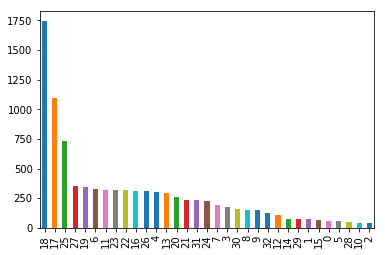

In [5]:
df_clean["Category_new"] = df_clean["Category"].map(df_dict)
df_clean["Category_new"].value_counts().plot(kind ='bar');

In [6]:
## Clean 'Reviews' variable 

df_clean['Reviews'] = df_clean['Reviews'].astype(int)

In [7]:
# Scaling and cleaning size of installation

def full_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

df_clean["Size"] = df_clean["Size"].map(full_size)

In [8]:
df_clean.Size.fillna(method = 'ffill', inplace = True)

In [9]:
df_clean["Size"].unique()

array([1.90e+07, 1.40e+07, 8.70e+06, 2.50e+07, 2.80e+06, 5.60e+06,
       2.90e+07, 3.30e+07, 3.10e+06, 2.80e+07, 1.20e+07, 2.00e+07,
       2.10e+07, 3.70e+07, 5.50e+06, 1.70e+07, 3.90e+07, 3.10e+07,
       4.20e+06, 2.30e+07, 6.00e+06, 6.10e+06, 4.60e+06, 9.20e+06,
       5.20e+06, 1.10e+07, 2.40e+07, 9.40e+06, 1.50e+07, 1.00e+07,
       1.20e+06, 2.60e+07, 8.00e+06, 7.90e+06, 5.60e+07, 5.70e+07,
       3.50e+07, 5.40e+07, 2.01e+05, 3.60e+06, 5.70e+06, 8.60e+06,
       2.40e+06, 2.70e+07, 2.70e+06, 2.50e+06, 7.00e+06, 1.60e+07,
       3.40e+06, 8.90e+06, 3.90e+06, 2.90e+06, 3.80e+07, 3.20e+07,
       5.40e+06, 1.80e+07, 1.10e+06, 2.20e+06, 4.50e+06, 9.80e+06,
       5.20e+07, 9.00e+06, 6.70e+06, 3.00e+07, 2.60e+06, 7.10e+06,
       2.20e+07, 6.40e+06, 3.20e+06, 8.20e+06, 4.90e+06, 9.50e+06,
       5.00e+06, 5.90e+06, 1.30e+07, 7.30e+07, 6.80e+06, 3.50e+06,
       4.00e+06, 2.30e+06, 2.10e+06, 4.20e+07, 9.10e+06, 5.50e+07,
       2.30e+04, 7.30e+06, 6.50e+06, 1.50e+06, 7.50e+06, 5.10e

In [10]:
## Clean 'Installs' variable 

df_clean['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [11]:
df_clean['Installs'] = [i.split("+")[0].replace(',','') for i in df_clean['Installs']]

In [12]:
df_clean['Installs'] = df_clean['Installs'].astype(int)

In [13]:
## Clean 'Type' variable 

df_clean.loc[df_clean['Type'] == 'Free' , 'Type'] = 0
df_clean.loc[df_clean['Type'] == 'Paid' , 'Type'] = 1

In [14]:
df_clean['Type'].value_counts()

0    8715
1     645
Name: Type, dtype: int64

In [15]:
## Clean 'Price' variable 

df_clean['Price'] = [i.replace('.','').split('$')[-1] for i in df_clean['Price']] 

In [16]:
df_clean['Price'] = df_clean['Price'].astype(int)

In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              9360 non-null float64
Installs          9360 non-null int64
Type              9360 non-null int64
Price             9360 non-null int64
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
Category_new      9360 non-null int64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.1+ MB


In [18]:
## Clean 'Content Rating' variable 

df_clean['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [19]:
Cont_dict = {}
Cont_val = df_clean['Content Rating'].unique()

for i in range(len(Cont_val)):
    Cont_dict[Cont_val[i]] = i

df_clean['Content Rating'] = df_clean['Content Rating'].map(Cont_dict)

In [20]:
df_clean['Content Rating'][0:10]

0    0
1    0
2    0
3    1
4    0
5    0
6    0
7    0
8    0
9    0
Name: Content Rating, dtype: int64

In [21]:
## Clean 'Genres' variable 

df_clean['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [22]:
Gen_dict = {}
Gen_val = df_clean['Genres'].unique()

for i in range(len(Gen_val)):
    Gen_dict[Gen_val[i]] = i

df_clean['Genres'] = df_clean['Genres'].map(Gen_dict)

In [23]:
df_clean.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 10 columns):
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              9360 non-null float64
Installs          9360 non-null int64
Type              9360 non-null int64
Price             9360 non-null int64
Content Rating    9360 non-null int64
Genres            9360 non-null int64
Category_new      9360 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 804.4+ KB


## Modeling

In [25]:
df_clean.Category_new.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [26]:
# Liner Regression: LabelEncoder

from sklearn import preprocessing

lbl = preprocessing.LabelEncoder()
lbl.fit(df_clean['Category'])
df_clean['Category'] = lbl.transform(df_clean['Category'])
df_clean['Category'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 15, 16, 17, 18,
       14, 11, 20, 27, 26, 24, 28, 30, 29, 23, 25, 22, 32, 31, 21, 19])

In [27]:
# Liner Regression Model

from sklearn.linear_model import LinearRegression

X = df_clean.drop(labels = ['Category_new','Rating'],axis = 1)
y = df_clean['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7488, 8), (1872, 8), (7488,), (1872,))

In [29]:
X_train.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres
377,6,40751,35000000.0,10000000,0,0,1,9
8377,29,27,34000000.0,1000,0,0,0,90
3439,23,87300,13000000.0,1000000,0,0,0,92
9218,4,1,4300000.0,5,0,0,0,6
9368,20,18,3500000.0,1000,0,0,0,84


In [30]:
import statsmodels.api as sm

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     6730.
Date:                Wed, 12 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:10:33   Log-Likelihood:                -17824.
No. Observations:                9360   AIC:                         3.566e+04
Df Residuals:                    9352   BIC:                         3.572e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Category           0.2035      0.003     68.664      0.000       0.198       0.209
Reviews        -1.769e-08   7.03e-09     -2.518      0.012   -3.15e-08   -3.92e-09
Size            3.178e-08   6.69e-10     47.511      0.000    3.05e-08    3.31e-08
Installs        1.015e-09    2.4e-10      4.224      0.000    5.44e-10    1.49e-09
Type               0.7884      0.068     11.588      0.000       0.655       0.922
Price           7.881e-06   1.09e-05      0.723      0.470   -1.35e-05    2.93e-05
Content Rating     0.3928      0.021     18.332      0.000       0.351       0.435
Genres            -0.0147      0.001    -16.669      0.000      -0.016      -0.013
==============================================================================
Omnibus:                       21.069   Durbin-Watson:                   1.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.868
Skew:                          -0.085   Prob(JB):                     4.85e-05
Kurtosis:                       2.852   Cond. No.                     3.78e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.78e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# Liner Regression Prediciton

model = LinearRegression()
model.fit(X_train,y_train)

Results = model.predict(X_test)

In [32]:
print(Results)

[4.14131028 4.25518225 4.30873527 ... 4.17009899 4.19984977 4.25706889]


In [33]:
# Mean Squared Errors (MSE)

result = pd.DataFrame({'Actual': y_test, 'Predicted': Results})  
print('Simple Regression Results')
print(result.head())
print('')

MSE = metrics.mean_squared_log_error(y_test,Results)
print('Mean squared Log Error : ' + str(MSE))

Simple Regression Results
      Actual  Predicted
3539     4.2   4.141310
4869     4.4   4.255182
8474     2.7   4.308735
9892     3.8   4.198996
5997     3.6   4.166366

Mean squared Log Error : 0.012746503818520653


In [34]:
# Support Vector Machines Model(SVM)

from sklearn import svm

X = df_clean.drop(labels = ['Category','Rating','Genres'],axis = 1)
y = df_clean['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [35]:
# SVM Prediction

model2 = svm.SVR()
model2.fit(X_train,y_train)

Results2 = model2.predict(X_test)

/Users/alen/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [36]:
print(Results2)

[4.19288688 4.8403149  4.19288688 ... 4.19288688 4.19288688 4.19288688]


In [37]:
# Mean Squared Errors (MSE)

result = pd.DataFrame({'Actual': y_test, 'Predicted': Results2})  
print('Support Vector Regression')
print(result.head())  
print('')

MSE2 = metrics.mean_squared_log_error(y_test,Results2)
print('Mean squared Log Error : ' + str(MSE2))

Support Vector Regression
       Actual  Predicted
1866      4.4   4.192887
7110      4.3   4.840315
3270      4.5   4.192887
9276      3.3   4.192887
10207     4.7   4.192887

Mean squared Log Error : 0.014375746856041191


In [38]:
# Set 'Rating >= 4.5' to 1 ; otherwise to 0

df_clean.loc[df_clean['Rating'] >= 4.5 , 'Rating'] = 1

In [39]:
df_clean[df_clean['Rating'] == 1].count()

Category          2970
Rating            2970
Reviews           2970
Size              2970
Installs          2970
Type              2970
Price             2970
Content Rating    2970
Genres            2970
Category_new      2970
dtype: int64

In [40]:
df_clean.loc[df_clean['Rating'] != 1 , 'Rating'] = 0

In [41]:
df_clean[df_clean['Rating'] == 0].count()

Category          6390
Rating            6390
Reviews           6390
Size              6390
Installs          6390
Type              6390
Price             6390
Content Rating    6390
Genres            6390
Category_new      6390
dtype: int64

In [42]:
df_clean['Rating'].value_counts()

0.0    6390
1.0    2970
Name: Rating, dtype: int64

In [43]:
df_clean.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Category_new
0,0,0.0,159,19000000.0,10000,0,0,0,0,0
1,0,0.0,967,14000000.0,500000,0,0,0,1,0
2,0,1.0,87510,8700000.0,5000000,0,0,0,0,0
3,0,1.0,215644,25000000.0,50000000,0,0,1,0,0
4,0,0.0,967,2800000.0,100000,0,0,0,2,0


In [44]:
# Random Forest Regressor Model(RFR)

from sklearn.ensemble import RandomForestRegressor

X = df_clean.drop(labels = ['Category_new','Rating'],axis = 1)
y = df_clean['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 8 columns):
Category          9360 non-null int64
Reviews           9360 non-null int64
Size              9360 non-null float64
Installs          9360 non-null int64
Type              9360 non-null int64
Price             9360 non-null int64
Content Rating    9360 non-null int64
Genres            9360 non-null int64
dtypes: float64(1), int64(7)
memory usage: 658.1 KB


In [46]:
# # Random Forest Regressor: Feature Importance 

rf = RandomForestRegressor()
rf.fit(X, y)
print ("Features by their score:")
rf.feature_importances_

/Users/alen/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Features by their score:


array([0.09429628, 0.35204295, 0.25899961, 0.11415128, 0.0057267 ,
       0.0194474 , 0.0338902 , 0.12144559])

In [47]:
a = pd.DataFrame({'Category': [rf.feature_importances_[0]], 'Reviews': [rf.feature_importances_[1]], \
              'Size': [rf.feature_importances_[2]], 'Installs': [rf.feature_importances_[3]], \
              'Type': [rf.feature_importances_[4]], 'Price': [rf.feature_importances_[5]], \
              'Content Rating': [rf.feature_importances_[6]], 'Genres': [rf.feature_importances_[7]]}) 
print('Feature Importance by their score:')
a

Feature Importance by their score:


,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,0.094296,0.352043,0.259,0.114151,0.005727,0.019447,0.03389,0.121446


In [48]:
# Random Forest Regressor 

model3 = RandomForestRegressor()
model3.fit(X_train,y_train)
Results3 = model3.predict(X_test)

/Users/alen/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [49]:
# Random Forest Classification (RFC)

from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=150)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [50]:
# Model Accuracy

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7612179487179487


In [51]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index = X_train.columns).sort_values(ascending=False)
feature_imp

Reviews           0.339831
Size              0.268985
Installs          0.122721
Genres            0.121045
Category          0.092669
Content Rating    0.031038
Price             0.018920
Type              0.004790
dtype: float64

No handles with labels found to put in legend.


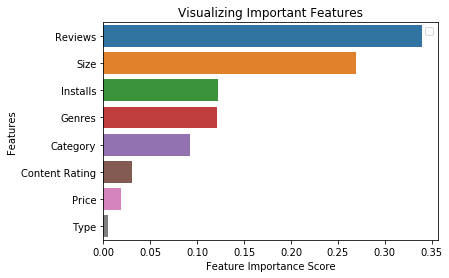

In [52]:
# Visualizing Important features (RFC)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
#sns.barplot(x=feature_imp.index, y=feature_imp)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [53]:
print(Results3)

[0.  0.  0.  ... 0.5 0.7 0. ]


In [54]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': Results3})  
print('Random Forest Regressor')
print(result.head())  
print('')

MSE3 = metrics.mean_squared_log_error(y_test,Results3)
print('Mean squared Log Error : ' + str(MSE3))

Random Forest Regressor
       Actual  Predicted
10509     0.0        0.0
9936      0.0        0.0
6411      0.0        0.0
6493      0.0        1.0
6731      0.0        0.8

Mean squared Log Error : 0.09001617985607141


In [55]:
# Comparison between each MSE

MSE_compar = pd.DataFrame({'LR': [MSE], 'SVR': [MSE2], 'RFR': [MSE3]})  
MSE_compar

,LR,SVR,RFR
0,0.012747,0.014376,0.090016


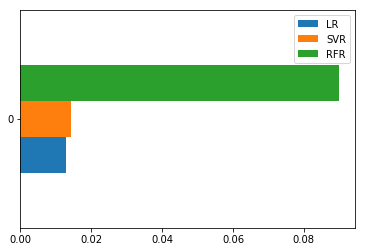

In [56]:
MSE_compar.plot(kind='barh');

In [57]:
# Comparison between each MSE

MSE_compar = pd.DataFrame({'LR': [MSE], 'RFR': [MSE3]})  
MSE_compar

,LR,RFR
0,0.012747,0.090016


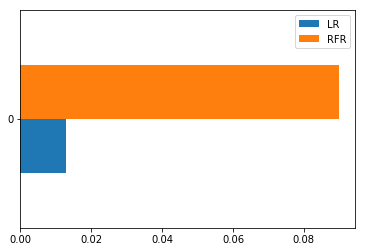

In [58]:
MSE_compar.plot(kind='barh');